# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/BPIC17/BPIC_2017_all_5_train.pkl'
# Load the dataset using torch.load
BPIC_17_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/BPIC17/BPIC_2017_all_5_val.pkl'
# Load the dataset using torch.load
BPIC_17_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 17 Dataset Categories, Features:

bpic_17_all_categories = BPIC_17_train_dataset.all_categories

bpic_17_all_categories_cat = bpic_17_all_categories[0]
print(bpic_17_all_categories_cat)

bpic_17_all_categories_num = bpic_17_all_categories[1]
print(bpic_17_all_categories_num)

for i, cat in enumerate(bpic_17_all_categories_cat):
     print(f"BPIC 17 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic_17_all_categories_num):
     print(f"BPIC 17 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Amount Category Lables: {num[1]}")

[('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 150, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'User_111': 16, 'User_112

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic_17_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic_17_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name', 'org:resource', 'lifecycle:transition']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'Action', 'org:resource', 'EventOrigin', 'lifecycle:transition', 'case:LoanGoal', 'case:ApplicationType', 'Accepted', 'Selected'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore']]
Features decoder:  [['concept:name', 'org:resource', 'lifecycle:transition'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic_17_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 150, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'U

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_BPIC17_grad")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-6

# Optimizer and Scheduler
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-10)

# Epochs
num_epochs = 100

# Batch size
batch_size = 256

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=BPIC_17_train_dataset,
                  data_val=BPIC_17_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature= [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'BPIC_2017_setting_2.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(28, 10)
    (1): Embedding(7, 5)
    (2): Embedding(150, 26)
    (3): Embedding(5, 4)
    (4): Embedding(9, 5)
    (5): Embedding(16, 8)
    (6): Embedding(4, 3)
    (7-8): 2 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(28, 10)
      (1): Embedding(7, 5)
      (2): Embedding(150, 26)
      (3): Embedding(5, 4)
      (4): Embedding(9, 5)
      (5): Embedding(16, 8)
      (6): Embedding(4, 3)
      (7-8): 2 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=78, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=78, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=78, out_features=128, bias=True)
      (Uc): Lin

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.9427


Validation: Avg Standard Validation Loss: 12.6189
Validation: Avg Attenuated Validation Loss: 12.9263
Validation Loss for Scheduler: 12.6189
saving model


Epoch [2/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 14.6303


Validation: Avg Standard Validation Loss: 11.9459
Validation: Avg Attenuated Validation Loss: 11.8514
Validation Loss for Scheduler: 11.9459
saving model


Epoch [3/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.7086


Validation: Avg Standard Validation Loss: 11.3047
Validation: Avg Attenuated Validation Loss: 10.8062
Validation Loss for Scheduler: 11.3047
saving model


Epoch [4/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.0398


Validation: Avg Standard Validation Loss: 10.6881
Validation: Avg Attenuated Validation Loss: 10.0179
Validation Loss for Scheduler: 10.6881
saving model


Epoch [5/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.0753


Validation: Avg Standard Validation Loss: 10.3076
Validation: Avg Attenuated Validation Loss: 9.4460
Validation Loss for Scheduler: 10.3076
saving model


Epoch [6/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.2115


Validation: Avg Standard Validation Loss: 10.1032
Validation: Avg Attenuated Validation Loss: 9.0822
Validation Loss for Scheduler: 10.1032
saving model


Epoch [7/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.2515


Validation: Avg Standard Validation Loss: 9.9560
Validation: Avg Attenuated Validation Loss: 8.8106
Validation Loss for Scheduler: 9.9560
saving model


Epoch [8/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.2147


Validation: Avg Standard Validation Loss: 9.8240
Validation: Avg Attenuated Validation Loss: 8.5838
Validation Loss for Scheduler: 9.8240
saving model


Epoch [9/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.1166


Validation: Avg Standard Validation Loss: 9.7146
Validation: Avg Attenuated Validation Loss: 8.4042
Validation Loss for Scheduler: 9.7146
saving model


Epoch [10/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.0118


Validation: Avg Standard Validation Loss: 9.6268
Validation: Avg Attenuated Validation Loss: 8.2596
Validation Loss for Scheduler: 9.6268
saving model


Epoch [11/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.8847


Validation: Avg Standard Validation Loss: 9.5895
Validation: Avg Attenuated Validation Loss: 8.1721
Validation Loss for Scheduler: 9.5895
saving model


Epoch [12/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.7788


Validation: Avg Standard Validation Loss: 9.5581
Validation: Avg Attenuated Validation Loss: 8.1079
Validation Loss for Scheduler: 9.5581
saving model


Epoch [13/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.6450


Validation: Avg Standard Validation Loss: 9.5237
Validation: Avg Attenuated Validation Loss: 8.0459
Validation Loss for Scheduler: 9.5237
saving model


Epoch [14/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.4949


Validation: Avg Standard Validation Loss: 9.4882
Validation: Avg Attenuated Validation Loss: 7.9848
Validation Loss for Scheduler: 9.4882
saving model


Epoch [15/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.3597


Validation: Avg Standard Validation Loss: 9.4193
Validation: Avg Attenuated Validation Loss: 7.8979
Validation Loss for Scheduler: 9.4193
saving model


Epoch [16/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.2327


Validation: Avg Standard Validation Loss: 9.2339
Validation: Avg Attenuated Validation Loss: 7.6961
Validation Loss for Scheduler: 9.2339
saving model


Epoch [17/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.0595


Validation: Avg Standard Validation Loss: 9.1115
Validation: Avg Attenuated Validation Loss: 7.5642
Validation Loss for Scheduler: 9.1115
saving model


Epoch [18/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.8951


Validation: Avg Standard Validation Loss: 8.9652
Validation: Avg Attenuated Validation Loss: 7.4001
Validation Loss for Scheduler: 8.9652
saving model


Epoch [19/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.7491


Validation: Avg Standard Validation Loss: 8.8022
Validation: Avg Attenuated Validation Loss: 7.2168
Validation Loss for Scheduler: 8.8022
saving model


Epoch [20/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.5655


Validation: Avg Standard Validation Loss: 8.6838
Validation: Avg Attenuated Validation Loss: 7.0790
Validation Loss for Scheduler: 8.6838
saving model


Epoch [21/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.4390


Validation: Avg Standard Validation Loss: 8.5846
Validation: Avg Attenuated Validation Loss: 6.9594
Validation Loss for Scheduler: 8.5846
saving model


Epoch [22/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.2481


Validation: Avg Standard Validation Loss: 8.4966
Validation: Avg Attenuated Validation Loss: 6.8530
Validation Loss for Scheduler: 8.4966
saving model


Epoch [23/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.0930


Validation: Avg Standard Validation Loss: 8.4161
Validation: Avg Attenuated Validation Loss: 6.7602
Validation Loss for Scheduler: 8.4161
saving model


Epoch [24/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.9501


Validation: Avg Standard Validation Loss: 8.3382
Validation: Avg Attenuated Validation Loss: 6.6712
Validation Loss for Scheduler: 8.3382
saving model


Epoch [25/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.8176


Validation: Avg Standard Validation Loss: 8.2674
Validation: Avg Attenuated Validation Loss: 6.5954
Validation Loss for Scheduler: 8.2674
saving model


Epoch [26/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.6564


Validation: Avg Standard Validation Loss: 8.2043
Validation: Avg Attenuated Validation Loss: 6.5174
Validation Loss for Scheduler: 8.2043
saving model


Epoch [27/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.5144


Validation: Avg Standard Validation Loss: 8.1333
Validation: Avg Attenuated Validation Loss: 6.4316
Validation Loss for Scheduler: 8.1333
saving model


Epoch [28/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.3615


Validation: Avg Standard Validation Loss: 8.0674
Validation: Avg Attenuated Validation Loss: 6.3460
Validation Loss for Scheduler: 8.0674
saving model


Epoch [29/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.1870


Validation: Avg Standard Validation Loss: 8.0112
Validation: Avg Attenuated Validation Loss: 6.2820
Validation Loss for Scheduler: 8.0112
saving model


Epoch [30/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.0509


Validation: Avg Standard Validation Loss: 7.9425
Validation: Avg Attenuated Validation Loss: 6.2003
Validation Loss for Scheduler: 7.9425
saving model


Epoch [31/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.8755


Validation: Avg Standard Validation Loss: 7.8858
Validation: Avg Attenuated Validation Loss: 6.1291
Validation Loss for Scheduler: 7.8858
saving model


Epoch [32/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.7197


Validation: Avg Standard Validation Loss: 7.8270
Validation: Avg Attenuated Validation Loss: 6.0544
Validation Loss for Scheduler: 7.8270
saving model


Epoch [33/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.5646


Validation: Avg Standard Validation Loss: 7.7696
Validation: Avg Attenuated Validation Loss: 5.9813
Validation Loss for Scheduler: 7.7696
saving model


Epoch [34/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.3921


Validation: Avg Standard Validation Loss: 7.7175
Validation: Avg Attenuated Validation Loss: 5.9073
Validation Loss for Scheduler: 7.7175
saving model


Epoch [35/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.2003


Validation: Avg Standard Validation Loss: 7.6618
Validation: Avg Attenuated Validation Loss: 5.8366
Validation Loss for Scheduler: 7.6618
saving model


Epoch [36/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 8.9460


Validation: Avg Standard Validation Loss: 7.5954
Validation: Avg Attenuated Validation Loss: 5.7382
Validation Loss for Scheduler: 7.5954
saving model


Epoch [37/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 8.6062


Validation: Avg Standard Validation Loss: 7.5366
Validation: Avg Attenuated Validation Loss: 5.6624
Validation Loss for Scheduler: 7.5366
saving model


Epoch [38/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 8.1780


Validation: Avg Standard Validation Loss: 7.4778
Validation: Avg Attenuated Validation Loss: 5.5782
Validation Loss for Scheduler: 7.4778
saving model


Epoch [39/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 7.6533


Validation: Avg Standard Validation Loss: 7.4184
Validation: Avg Attenuated Validation Loss: 5.5133
Validation Loss for Scheduler: 7.4184
saving model


Epoch [40/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 7.1123


Validation: Avg Standard Validation Loss: 7.3685
Validation: Avg Attenuated Validation Loss: 5.4738
Validation Loss for Scheduler: 7.3685
saving model


Epoch [41/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 6.5992


Validation: Avg Standard Validation Loss: 7.3150
Validation: Avg Attenuated Validation Loss: 5.3765
Validation Loss for Scheduler: 7.3150
saving model


Epoch [42/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 6.0924


Validation: Avg Standard Validation Loss: 7.2749
Validation: Avg Attenuated Validation Loss: 5.3375
Validation Loss for Scheduler: 7.2749
saving model


Epoch [43/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 5.5237


Validation: Avg Standard Validation Loss: 7.2384
Validation: Avg Attenuated Validation Loss: 5.3320
Validation Loss for Scheduler: 7.2384
saving model


Epoch [44/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.9571


Validation: Avg Standard Validation Loss: 7.2039
Validation: Avg Attenuated Validation Loss: 5.3002
Validation Loss for Scheduler: 7.2039
saving model


Epoch [45/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.4536


Validation: Avg Standard Validation Loss: 7.1795
Validation: Avg Attenuated Validation Loss: 5.3358
Validation Loss for Scheduler: 7.1795
saving model


Epoch [46/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.0480


Validation: Avg Standard Validation Loss: 7.1518
Validation: Avg Attenuated Validation Loss: 5.3370
Validation Loss for Scheduler: 7.1518
saving model


Epoch [47/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 3.6505


Validation: Avg Standard Validation Loss: 7.1274
Validation: Avg Attenuated Validation Loss: 5.4094
Validation Loss for Scheduler: 7.1274
saving model


Epoch [48/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 3.2808


Validation: Avg Standard Validation Loss: 7.1000
Validation: Avg Attenuated Validation Loss: 5.4287
Validation Loss for Scheduler: 7.1000
saving model


Epoch [49/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 3.0372


Validation: Avg Standard Validation Loss: 7.0784
Validation: Avg Attenuated Validation Loss: 5.4696
Validation Loss for Scheduler: 7.0784
saving model


Epoch [50/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.8291


Validation: Avg Standard Validation Loss: 7.0569
Validation: Avg Attenuated Validation Loss: 5.4895
Validation Loss for Scheduler: 7.0569
saving model


Epoch [51/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.6163


Validation: Avg Standard Validation Loss: 7.0379
Validation: Avg Attenuated Validation Loss: 5.6271
Validation Loss for Scheduler: 7.0379
saving model


Epoch [52/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.4952


Validation: Avg Standard Validation Loss: 7.0135
Validation: Avg Attenuated Validation Loss: 5.6435
Validation Loss for Scheduler: 7.0135
saving model


Epoch [53/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.2774


Validation: Avg Standard Validation Loss: 7.0007
Validation: Avg Attenuated Validation Loss: 5.7479
Validation Loss for Scheduler: 7.0007
saving model


Epoch [54/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.0853


Validation: Avg Standard Validation Loss: 6.9798
Validation: Avg Attenuated Validation Loss: 5.6972
Validation Loss for Scheduler: 6.9798
saving model


Epoch [55/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.1066


Validation: Avg Standard Validation Loss: 6.9664
Validation: Avg Attenuated Validation Loss: 5.5953
Validation Loss for Scheduler: 6.9664
saving model


Epoch [56/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.0171


Validation: Avg Standard Validation Loss: 6.9483
Validation: Avg Attenuated Validation Loss: 5.7751
Validation Loss for Scheduler: 6.9483
saving model


Epoch [57/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.8702


Validation: Avg Standard Validation Loss: 6.9330
Validation: Avg Attenuated Validation Loss: 6.0194
Validation Loss for Scheduler: 6.9330
saving model


Epoch [58/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.7423


Validation: Avg Standard Validation Loss: 6.9205
Validation: Avg Attenuated Validation Loss: 5.9353
Validation Loss for Scheduler: 6.9205
saving model


Epoch [59/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.6663


Validation: Avg Standard Validation Loss: 6.9058
Validation: Avg Attenuated Validation Loss: 6.1412
Validation Loss for Scheduler: 6.9058
saving model


Epoch [60/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.6418


Validation: Avg Standard Validation Loss: 6.8924
Validation: Avg Attenuated Validation Loss: 6.3307
Validation Loss for Scheduler: 6.8924
saving model


Epoch [61/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.6195


Validation: Avg Standard Validation Loss: 6.8705
Validation: Avg Attenuated Validation Loss: 6.5040
Validation Loss for Scheduler: 6.8705
saving model


Epoch [62/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.5736


Validation: Avg Standard Validation Loss: 6.8589
Validation: Avg Attenuated Validation Loss: 6.8407
Validation Loss for Scheduler: 6.8589
saving model


Epoch [63/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.5678


Validation: Avg Standard Validation Loss: 6.8459
Validation: Avg Attenuated Validation Loss: 6.5197
Validation Loss for Scheduler: 6.8459
saving model


Epoch [64/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.3728


Validation: Avg Standard Validation Loss: 6.8277
Validation: Avg Attenuated Validation Loss: 6.7231
Validation Loss for Scheduler: 6.8277
saving model


Epoch [65/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.4099


Validation: Avg Standard Validation Loss: 6.8174
Validation: Avg Attenuated Validation Loss: 6.8943
Validation Loss for Scheduler: 6.8174
saving model


Epoch [66/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.2926


Validation: Avg Standard Validation Loss: 6.8028
Validation: Avg Attenuated Validation Loss: 6.8502
Validation Loss for Scheduler: 6.8028
saving model


Epoch [67/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.1866


Validation: Avg Standard Validation Loss: 6.7948
Validation: Avg Attenuated Validation Loss: 6.9925
Validation Loss for Scheduler: 6.7948
saving model


Epoch [68/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.0446


Validation: Avg Standard Validation Loss: 6.7836
Validation: Avg Attenuated Validation Loss: 6.7779
Validation Loss for Scheduler: 6.7836
saving model


Epoch [69/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.0493


Validation: Avg Standard Validation Loss: 6.7748
Validation: Avg Attenuated Validation Loss: 7.3823
Validation Loss for Scheduler: 6.7748
saving model


Epoch [70/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9544


Validation: Avg Standard Validation Loss: 6.7550
Validation: Avg Attenuated Validation Loss: 7.2193
Validation Loss for Scheduler: 6.7550
saving model


Epoch [71/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9761


Validation: Avg Standard Validation Loss: 6.7426
Validation: Avg Attenuated Validation Loss: 7.1665
Validation Loss for Scheduler: 6.7426
saving model


Epoch [72/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9821


Validation: Avg Standard Validation Loss: 6.7299
Validation: Avg Attenuated Validation Loss: 6.9971
Validation Loss for Scheduler: 6.7299
saving model


Epoch [73/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9613


Validation: Avg Standard Validation Loss: 6.7145
Validation: Avg Attenuated Validation Loss: 7.5790
Validation Loss for Scheduler: 6.7145
saving model


Epoch [74/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.0042


Validation: Avg Standard Validation Loss: 6.7038
Validation: Avg Attenuated Validation Loss: 7.3488
Validation Loss for Scheduler: 6.7038
saving model


Epoch [75/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8284


Validation: Avg Standard Validation Loss: 6.6933
Validation: Avg Attenuated Validation Loss: 7.8387
Validation Loss for Scheduler: 6.6933
saving model


Epoch [76/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7279


Validation: Avg Standard Validation Loss: 6.6809
Validation: Avg Attenuated Validation Loss: 7.3886
Validation Loss for Scheduler: 6.6809
saving model


Epoch [77/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.5873


Validation: Avg Standard Validation Loss: 6.6689
Validation: Avg Attenuated Validation Loss: 7.2937
Validation Loss for Scheduler: 6.6689
saving model


Epoch [78/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.6085


Validation: Avg Standard Validation Loss: 6.6604
Validation: Avg Attenuated Validation Loss: 7.7143
Validation Loss for Scheduler: 6.6604
saving model


Epoch [79/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.3331


Validation: Avg Standard Validation Loss: 6.6463
Validation: Avg Attenuated Validation Loss: 7.7086
Validation Loss for Scheduler: 6.6463
saving model


Epoch [80/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.3126


Validation: Avg Standard Validation Loss: 6.6323
Validation: Avg Attenuated Validation Loss: 7.5168
Validation Loss for Scheduler: 6.6323
saving model


Epoch [81/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.1551


Validation: Avg Standard Validation Loss: 6.6266
Validation: Avg Attenuated Validation Loss: 7.2036
Validation Loss for Scheduler: 6.6266
saving model


Epoch [82/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.1811


Validation: Avg Standard Validation Loss: 6.6120
Validation: Avg Attenuated Validation Loss: 7.4913
Validation Loss for Scheduler: 6.6120
saving model


Epoch [83/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.0641


Validation: Avg Standard Validation Loss: 6.6031
Validation: Avg Attenuated Validation Loss: 7.6365
Validation Loss for Scheduler: 6.6031
saving model


Epoch [84/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.0066


Validation: Avg Standard Validation Loss: 6.5894
Validation: Avg Attenuated Validation Loss: 7.4603
Validation Loss for Scheduler: 6.5894
saving model


Epoch [85/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.1784


Validation: Avg Standard Validation Loss: 6.5791
Validation: Avg Attenuated Validation Loss: 7.6538
Validation Loss for Scheduler: 6.5791
saving model


Epoch [86/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.1263


Validation: Avg Standard Validation Loss: 6.5757
Validation: Avg Attenuated Validation Loss: 7.1086
Validation Loss for Scheduler: 6.5757
saving model


Epoch [87/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.0764


Validation: Avg Standard Validation Loss: 6.5629
Validation: Avg Attenuated Validation Loss: 7.2291
Validation Loss for Scheduler: 6.5629
saving model


Epoch [88/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.3146


Validation: Avg Standard Validation Loss: 6.5578
Validation: Avg Attenuated Validation Loss: 7.8407
Validation Loss for Scheduler: 6.5578
saving model


Epoch [89/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.2015


Validation: Avg Standard Validation Loss: 6.5424
Validation: Avg Attenuated Validation Loss: 7.3175
Validation Loss for Scheduler: 6.5424
saving model


Epoch [90/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.2409


Validation: Avg Standard Validation Loss: 6.5325
Validation: Avg Attenuated Validation Loss: 7.4102
Validation Loss for Scheduler: 6.5325
saving model


Epoch [91/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.3838


Validation: Avg Standard Validation Loss: 6.5246
Validation: Avg Attenuated Validation Loss: 7.3815
Validation Loss for Scheduler: 6.5246
saving model


Epoch [92/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.4556


Validation: Avg Standard Validation Loss: 6.5168
Validation: Avg Attenuated Validation Loss: 7.7917
Validation Loss for Scheduler: 6.5168
saving model


Epoch [93/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.6613


Validation: Avg Standard Validation Loss: 6.5104
Validation: Avg Attenuated Validation Loss: 7.6061
Validation Loss for Scheduler: 6.5104
saving model


Epoch [94/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.7394


Validation: Avg Standard Validation Loss: 6.5023
Validation: Avg Attenuated Validation Loss: 7.7397
Validation Loss for Scheduler: 6.5023
saving model


Epoch [95/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.7428


Validation: Avg Standard Validation Loss: 6.4953
Validation: Avg Attenuated Validation Loss: 7.7490
Validation Loss for Scheduler: 6.4953
saving model


Epoch [96/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.7714


Validation: Avg Standard Validation Loss: 6.4855
Validation: Avg Attenuated Validation Loss: 7.3351
Validation Loss for Scheduler: 6.4855
saving model


Epoch [97/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.9034


Validation: Avg Standard Validation Loss: 6.4748
Validation: Avg Attenuated Validation Loss: 7.3897
Validation Loss for Scheduler: 6.4748
saving model


Epoch [98/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.8382


Validation: Avg Standard Validation Loss: 6.4725
Validation: Avg Attenuated Validation Loss: 7.7235
Validation Loss for Scheduler: 6.4725
saving model


Epoch [99/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.9180


Validation: Avg Standard Validation Loss: 6.4593
Validation: Avg Attenuated Validation Loss: 7.4561
Validation Loss for Scheduler: 6.4593
saving model


Epoch [100/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: -0.9374


Validation: Avg Standard Validation Loss: 6.4529
Validation: Avg Attenuated Validation Loss: 7.3281
Validation Loss for Scheduler: 6.4529
saving model
Training complete.
Model saved to path: BPIC_2017_setting_2.pkl


# Training Visualization

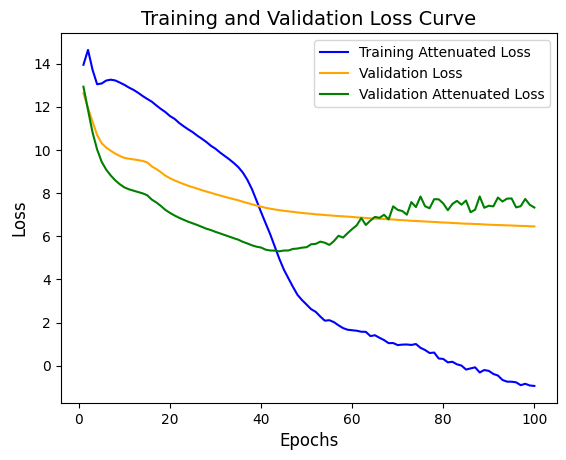

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()